In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 5

In [3]:
# loading the dataset using tf from the directory

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    shuffle = True,  #for shuffling,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

# we r using shuffling,so each batch contain diff-diff image that belongs to diff-diff label

Found 3900 files belonging to 13 classes.


In [4]:
dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    shuffle = True,  #for shuffling,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)


Found 228 files belonging to 13 classes.


In [5]:
print(len(dataset2))

8


In [6]:
print(len(dataset))

122


In [7]:
class_names = dataset.class_names
class_names

['Field Cricket',
 'Jute Stem Weevil',
 'Spilosoma Obliqua',
 'Yellow Mite',
 'aphids',
 'armyworm',
 'beetle',
 'bollworm',
 'grasshopper',
 'mites',
 'mosquito',
 'sawfly',
 'stem_borer']

In [8]:
print(len(dataset))             # batch size
#print(int(880/32)+1)

122


In [9]:
dataset.take(1)      #1st batch

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
for image_batch,label_batch in dataset.take(1):       # taking 1st batch
    print(image_batch.shape)   #image shape of that batch
    kp = image_batch.shape
    print(label_batch)  # kis label ka hai image 
    #print(label_batch.name)

(32, 256, 256, 3)
tf.Tensor(
[ 4  0  2 10  8  2  8  6 11 12 11  6  4  2  9 10  8  1  9  0  4  1  3  8
 12  6  2  6 11  7  1 10], shape=(32,), dtype=int32)


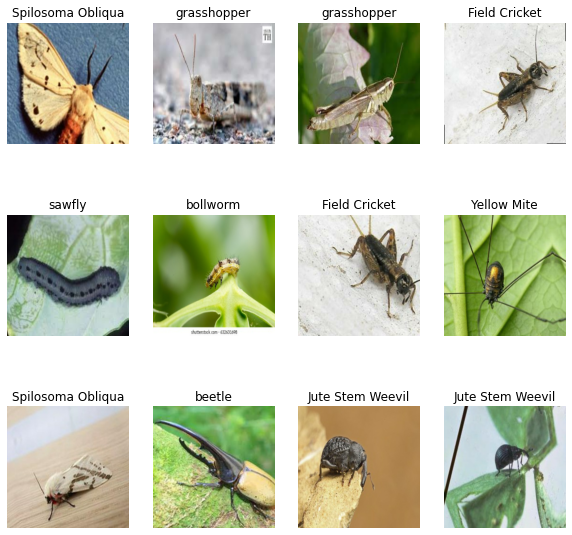

In [11]:
plt.figure(figsize=(10,10))
for image_bathc,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_bathc[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [12]:
len(dataset)
#28*32

122

In [13]:
# Steps---
# 1 - split into train and validation
# 2 - resize and rescale
# 3 - Data Augmentation
# 4 - Fit the model
# 5 - Check accuracy with test dataset

# Split into train and validation

In [14]:
train_size = 0.9
len(dataset)*train_size

109.8

In [15]:
train_ds=dataset.take(25)  # it will take first 25 batch of a batch of dataset and store in train_ds(NOW THis is our train ds)
len(train_ds)

25

In [16]:
"""def get_dataset_partition_tf(ds,train_split=0.9, val_split=0.1, shuffle = True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size)
    
    return train_ds,val_ds"""

'def get_dataset_partition_tf(ds,train_split=0.9, val_split=0.1, shuffle = True, shuffle_size=10000):\n    \n    ds_size = len(ds)\n    if shuffle:\n        ds = ds.shuffle(shuffle_size, seed=12)\n    \n    train_size = int(train_split*ds_size)\n    \n    train_ds = ds.take(train_size)\n    val_ds = ds.skip(train_size)\n    \n    return train_ds,val_ds'

In [17]:
#train_ds,val_ds = get_dataset_partition_tf(dataset)

In [18]:
len(dataset)

122

In [19]:
len(train_ds)           # total number of batch for training size 

25

In [20]:
def get_dataset_partitionn_tf(ds,val_split=0.5,test_split=0.5, shuffle = True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    val_size = int(val_split*ds_size)
    
    val_ds = ds.take(val_size)
    test_ds = ds.skip(val_size)
    
    return val_ds,test_ds



In [21]:
val_ds,test_ds = get_dataset_partitionn_tf(dataset2,val_split = 0.5,test_split=0.5)

In [22]:
len(val_ds)

4

In [23]:
len(test_ds)

4

# Till here train,test,val split wala part done
## Total batches for training  - 28 (aug) 
### Traing Batch       - 2    
### Validation Batch   -2 

In [24]:
# Augmentation 

import Augmentor


""""import Augmentor

path_to_data = "C:/Users/Asus/Desktop/Omdena/jute_insect_data_all/train/Jute Stem Weevil/"
p = Augmentor.Pipeline(path_to_data)
p.rotate(probability=0.85, max_left_rotation=10, max_right_rotation=10)    #rotation
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)                  #zoom
p.sample(2)  #how many images u want to augment

# probability parameter controls how often the operation is applied""""

In [25]:
total_class_in_dataset = list(dataset.class_names)
print(total_class_in_dataset)

['Field Cricket', 'Jute Stem Weevil', 'Spilosoma Obliqua', 'Yellow Mite', 'aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']


import os
def aug_img():
    
    count = 0
    dir_path = path_of_foldd
    for path in os.scandir(dir_path):
        if path.is_file():
            count += 1
    #print('file count:', count) 
    augmented_img = 300-count
    #print(lt,"ltt")
    return augmented_img
    
#aug_img()

In [26]:
# this function fix the number of augmented images and handle RGBA images
import os
import cv2
def aug_imgg():
    
    count = 0
    dir_path = path_of_foldd              # that dir path
    dir_list = (os.listdir(dir_path))            #file name of particular dir
    
    #print(dir_path)
    #print((dir_list))
    #dir_list.remove(dir_list[-1])
    #dir_list.remove(dir_list[0])
    #print(dir_list)
    for mm in range(len(dir_list)):
        #print(dir_list[mm])
        
        #print((dir_list))
        if dir_list[mm]=='output':
            pass
        else:
            #print(dir_path+dir_list[mm])
            im = cv2.imread(dir_path+dir_list[mm])
            
            #print(im.shape,"sfs")
            #print(im,"dsf")
            h,w,c = im.shape
            #print(c,"sdfsd")
            #print(im.shape)
            if c==4:
                #print(dir_list[mm])
                os.remove(dir_path+dir_list[mm])
            else:
                count=count+1
   
    #print('file count:', count) 
    augmented_img = 300-count
    if augmented_img>0:
        augmented_img = augmented_img
    else:
        augmented_img = 0
    #print(lt,"ltt")
    return augmented_img
    
#aug_imgg()

# pip install Pillow

In [27]:
# this function fix the number of augmented images and handle RGBA images, MAIN-------------------------------------------------
import os
import cv2
from PIL import Image
def aug_img():
    
    count = 0
    dir_path = path_of_foldd              # that dir path
    dir_list = (os.listdir(dir_path))            #file name of particular dir
    
    #print(dir_path)
    #print((dir_list))
    #print(dir_list)
    for mm in range(len(dir_list)):
        #print(dir_list[mm])
        #print(mm)
        #print((dir_list))
        if dir_list[mm]=='output':
            pass
        else:
            #print(dir_path+dir_list[mm])
            file_path = (dir_path+dir_list[mm])
            #print(file_path,"\n")
            
            #print("kjhkn")
            
            im1 = Image.open(file_path,'r')
                
            if im1.mode == 'RGB':
                #print(im1.mode)
                #im1.save(dir_path+'/'+'outputt/'+dir_list[mm])  # yha apn dusri dir mei file save krwa ke dekhre hai,isme khi
                                                                     # issue aata hai koi file mei toh use remove kr denge except use krke
                #print(im.shape,"sfs")
                #print(im,"dsf")
                count=count+1
                #print(dir_list[mm],'\n')
            else:
                os.remove(file_path)
            
    
   
    #print('file count:', count) 
    augmented_img = 300-count
    if augmented_img>0:
        augmented_img = augmented_img
    else:
        augmented_img = 0
    #print(lt,"ltt")
    return augmented_img
    
#aug_img()

In [28]:
"""# this function fix the number of augmented images and handle RGBA images
import os
import cv2
from PIL import Image
def aug_img():
    
    count = 0
    dir_path = path_of_foldd              # that dir path
    dir_list = (os.listdir(dir_path))            #file name of particular dir
    
    print(dir_path)
    #print((dir_list))
    #print(dir_list)
    for mm in range(len(dir_list)):
        #print(dir_list[mm])
        #print(mm)
        #print((dir_list))
        if dir_list[mm]=='output':
            pass
        else:
            #print(dir_path+dir_list[mm])
            file_path = (dir_path+dir_list[mm])
            #print(file_path,"\n")
            
            try:
                print("kjhkn")
                im1 = Image.open(file_path)
                
                if im1.mode == 'RGB':
                    print(im1.mode)
                    #im1.save(dir_path+'/'+'outputt/'+dir_list[mm])  # yha apn dusri dir mei file save krwa ke dekhre hai,isme khi
                                                                     # issue aata hai koi file mei toh use remove kr denge except use krke
                    #print(im.shape,"sfs")
                    #print(im,"dsf")
                    count=count+1
                    #print(dir_list[mm],'\n')
                else:
                    pass
                
            except:
                #print(dir_list[mm],'\n')
                #os.remove(file_path)
                print('sfd')
            
   
    #print('file count:', count) 
    augmented_img = 300-count
    if augmented_img>0:
        augmented_img = augmented_img
    else:
        augmented_img = 0
    #print(lt,"ltt")
    return augmented_img
    
aug_img()"""

'# this function fix the number of augmented images and handle RGBA images\nimport os\nimport cv2\nfrom PIL import Image\ndef aug_img():\n    \n    count = 0\n    dir_path = path_of_foldd              # that dir path\n    dir_list = (os.listdir(dir_path))            #file name of particular dir\n    \n    print(dir_path)\n    #print((dir_list))\n    #print(dir_list)\n    for mm in range(len(dir_list)):\n        #print(dir_list[mm])\n        #print(mm)\n        #print((dir_list))\n        if dir_list[mm]==\'output\':\n            pass\n        else:\n            #print(dir_path+dir_list[mm])\n            file_path = (dir_path+dir_list[mm])\n            #print(file_path,"\n")\n            \n            try:\n                print("kjhkn")\n                im1 = Image.open(file_path)\n                \n                if im1.mode == \'RGB\':\n                    print(im1.mode)\n                    #im1.save(dir_path+\'/\'+\'outputt/\'+dir_list[mm])  # yha apn dusri dir mei file save krwa

In [29]:
"""# this function fix the number of augmented images and handle RGBA images
import os
import cv2
from PIL import Image
def aug_img():
    
    count = 0
    dir_path = path_of_foldd              # that dir path
    dir_list = (os.listdir(dir_path))            #file name of particular dir
    
    #print(dir_path)
    #print((dir_list))
    #print(dir_list)
    #path = "C:/Users/Asus/Desktop/trash"+""/outputt"
    #os.mkdir(path)
    for mm in range(len(dir_list)):
        #print(dir_list[mm])
        
        #print((dir_list))
        if dir_list[mm]=='output':
            pass
        else:
            #print(dir_path+dir_list[mm])
            file_path = (dir_path+dir_list[mm])
            try:
                im1 = Image.open(file_path)
                im1.save(dir_path+'/'+'outputt/'+dir_list[mm])  # yha apn dusri dir mei file save krwa ke dekhre hai,isme khi
                                                                 # issue aata hai koi file mei toh use remove kr denge except use krke
                #print(im.shape,"sfs")
                #print(im,"dsf")
                count=count+1
                #print(dir_list[mm],'\n')
                
            except:
                print(dir_list[mm],'\n')
                #os.remove(file_path)
            
   
    #print('file count:', count) 
    augmented_img = 300-count
    if augmented_img>0:
        augmented_img = augmented_img
    else:
        augmented_img = 0
    #print(lt,"ltt")
    return augmented_img
    
aug_img()"""

'# this function fix the number of augmented images and handle RGBA images\nimport os\nimport cv2\nfrom PIL import Image\ndef aug_img():\n    \n    count = 0\n    dir_path = path_of_foldd              # that dir path\n    dir_list = (os.listdir(dir_path))            #file name of particular dir\n    \n    #print(dir_path)\n    #print((dir_list))\n    #print(dir_list)\n    #path = "C:/Users/Asus/Desktop/trash"+""/outputt"\n    #os.mkdir(path)\n    for mm in range(len(dir_list)):\n        #print(dir_list[mm])\n        \n        #print((dir_list))\n        if dir_list[mm]==\'output\':\n            pass\n        else:\n            #print(dir_path+dir_list[mm])\n            file_path = (dir_path+dir_list[mm])\n            try:\n                im1 = Image.open(file_path)\n                im1.save(dir_path+\'/\'+\'outputt/\'+dir_list[mm])  # yha apn dusri dir mei file save krwa ke dekhre hai,isme khi\n                                                                 # issue aata hai koi file 

# RGBA Image checker

import os
import cv2
path_to_data = "C:/Users/Asus/Desktop/Main dataset/train/"

for m in range(len(total_class_in_dataset)):
    path_of_foldd = path_to_data+total_class_in_dataset[m]+'/'
    dir_list = (os.listdir(path_of_foldd))
    k = dir_list
  
    for mm in range(len(k)):
       
        im = cv2.imread(path_of_foldd+k[mm])
        h,w,c = im.shape
        if c==4:
            print(im.shape)
        else:
            pass
    
    #for x in len(dir_list):
        
    #print(path_of_foldd,"aa")
    #files_path = [os.path.abspath(x) for x in os.listdir(path_of_foldd)]


"""for q in files_path:
    #print(q[-4:])
    print(q,"\n")
   """
        

In [30]:
import Augmentor

path_to_data = "C:/Users/Asus/Desktop/Main dataset/train/"

for m in range(len(total_class_in_dataset)):
    path_of_foldd = path_to_data+total_class_in_dataset[m]+'/'
    
        
    p = Augmentor.Pipeline(path_of_foldd)
    p.rotate(probability=0.9, max_left_rotation=10, max_right_rotation=10)    #rotation
    p.zoom(probability=0.4, min_factor=1.1, max_factor=1.6)                  #zoom
    sp = aug_img()
            #print(sp,"sd")
    p.sample(sp)  #how many images u want to augment

            # probability parameter controls how often the operation is applied


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/Field Cricket/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x22B0705E190>: 100%|█| 300/300 [00:01<00:00, 273.48 Samples


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/Jute Stem Weevil/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x22B07065E20>: 100%|█| 300/300 [00:01<00:


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/Spilosoma Obliqua/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x22B0705DF10>: 100%|█| 300/300 [00:01<00:00, 241.16 Samples


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/Yellow Mite/output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x22B0707ED90>: 100%|█| 300/300 [00:01<00:00, 227.96 Samples


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/aphids/output.

Processing <PIL.Image.Image image mode=RGB size=275x183 at 0x22B070861F0>: 100%|█| 300/300 [00:01<00:00, 167.97 Samples


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/armyworm/output.

Processing <PIL.Image.Image image mode=RGB size=1024x350 at 0x22B07027A30>: 100%|█| 300/300 [00:02<00:00, 143.47 Sample


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/beetle/output.

Processing <PIL.Image.Image image mode=RGB size=225x224 at 0x22B0709E460>: 100%|█| 300/300 [00:01<00:00, 221.73 Samples


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/bollworm/output.

Processing <PIL.Image.Image image mode=RGB size=210x240 at 0x22B070908E0>: 100%|█| 300/300 [00:01<00:00, 182.15 Samples


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/grasshopper/output.

Processing <PIL.Image.Image image mode=RGB size=322x157 at 0x22B0707EDF0>: 100%|█| 300/300 [00:03<00:00, 92.40 Samples/


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/mites/output.

Processing <PIL.Image.Image image mode=RGB size=249x202 at 0x22B0708DF40>: 100%|█| 300/300 [00:02<00:00, 124.84 Samples


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/mosquito/output.

Processing <PIL.Image.Image image mode=RGB size=259x194 at 0x22B0709EB50>: 100%|█| 300/300 [00:03<00:00, 96.71 Samples/


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/sawfly/output.

Processing <PIL.Image.Image image mode=RGB size=209x241 at 0x22B0707ADC0>: 100%|█| 300/300 [00:01<00:00, 254.24 Samples


Initialised with 300 image(s) found.
Output directory set to C:/Users/Asus/Desktop/Main dataset/train/stem_borer/output.

Processing <PIL.Image.Image image mode=RGB size=413x287 at 0x22B0705E610>: 100%|█| 300/300 [00:04<00:00, 72.01 Samples/


In [31]:
# Run this cell only one tiime
#from pathlib import Path
#import shutil
#import os

#path_to_data = "C:/Users/Asus/Desktop/Main dataset/train/"


#for XD in range(len(total_class_in_dataset)):
#    path_of_new_img = path_to_data+total_class_in_dataset[XD]+'/'+'output'+'/'
#    path_of_fold = path_to_data+total_class_in_dataset[XD]+'/'
     #print(path_of_fold)
     #print(path_of_new_img,'\n')
#    files=os.listdir(path_of_new_img)

     # iterating over all the files in
     # the source directory
#    for file_name in files:
#       shutil.copy(path_of_new_img+file_name, path_of_fold+file_name)
#    print("Files are copied successfully")
    
    

In [32]:
import shutil

path_to_data = "C:/Users/Asus/Desktop/Main dataset/train/"

for lol in range(len(total_class_in_dataset)):
    folder_path = path_to_data+total_class_in_dataset[lol]+'/'+'output'+'/'                
    shutil.rmtree(folder_path)                                           # removing the new dir that is created during data augmentation
    
    #shutil.rmtree("C:/Users/Asus/Desktop/Omdena/jute_insect_data_all/train/Jute Stem Weevil/output/")
print("Successfully removed created folder")

Successfully removed created folder


# Steps left ----
# fit the model
# accuracy

In [33]:
train_ds = dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [34]:
resize_and_rescale =tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),   #ydi and model predict kre aur jb we get a image that is not 256*256
                                                            # this will make it betwwen 256*256
    
])

In [35]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 13

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(4,4),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4),activation='relu',input_shape = input_shape),        
    layers.MaxPooling2D((2,2)), 
    
    layers.Conv2D(64,(4,4),activation='relu'),             
    layers.MaxPooling2D((2,2)),  
    layers.Conv2D(64,(4,4),activation='relu'),            
    layers.MaxPooling2D((2,2)),  
    layers.Conv2D(64,(4,4),activation='relu'),                  
    layers.MaxPooling2D((2,2)),                         # the value in Convo2D and MaxPolling is fully based on hit and trail approach

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)


In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 253, 253, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 126, 126, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 123, 123, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 61, 61, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 58, 58, 64)         

In [37]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [38]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [39]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=4,
    verbose=1,
)
model_checkpoint = ModelCheckpoint(
    filepath="./model_weights.h5",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1,
)
model_callbacks = [early_stopping, model_checkpoint]

In [40]:
history = model.fit(
    dataset,
    epochs = EPOCHS,
    batch_size= BATCH_SIZE,
    verbose =1,
    validation_data=val_ds,
    callbacks=model_callbacks,
)

Epoch 1/5
122/122 [==============================] - ETA: 0s - loss: 2.5626 - accuracy: 0.0856
Epoch 1: val_loss improved from inf to 2.56621, saving model to .\model_weights.h5
122/122 [==============================] - 282s 2s/step - loss: 2.5626 - accuracy: 0.0856 - val_loss: 2.5662 - val_accuracy: 0.0400
Epoch 2/5
122/122 [==============================] - ETA: 0s - loss: 2.4974 - accuracy: 0.1195
Epoch 2: val_loss improved from 2.56621 to 2.33475, saving model to .\model_weights.h5
122/122 [==============================] - 281s 2s/step - loss: 2.4974 - accuracy: 0.1195 - val_loss: 2.3347 - val_accuracy: 0.2400
Epoch 3/5
122/122 [==============================] - ETA: 0s - loss: 2.2962 - accuracy: 0.2123
Epoch 3: val_loss improved from 2.33475 to 2.25321, saving model to .\model_weights.h5
122/122 [==============================] - 280s 2s/step - loss: 2.2962 - accuracy: 0.2123 - val_loss: 2.2532 - val_accuracy: 0.2000
Epoch 4/5
122/122 [==============================] - ETA: 0s -

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

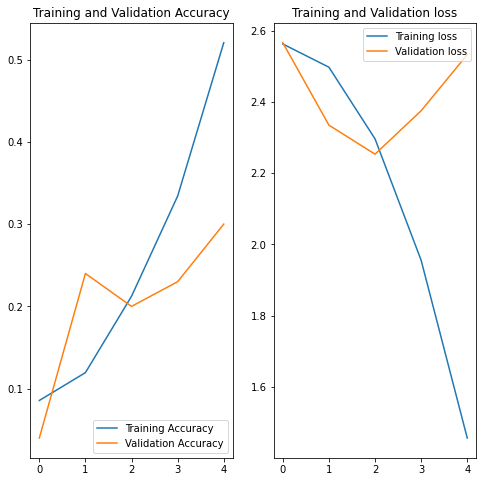

In [42]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")


# plot loss  and val_loss accuracy

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='upper right')              # means jo apn indication box hai woh right upper mei aayga
plt.title("Training and Validation loss")
plt.show()

In [43]:
# Testing
score = model.evaluate(test_ds)


4/4 [==============================] - 2s 446ms/step - loss: 3.0079 - accuracy: 0.2400


In [44]:
score              # testing score

[3.0079164505004883, 0.23999999463558197]

In [45]:
# about history
history.params

{'verbose': 1, 'epochs': 5, 'steps': 122}

In [46]:
def pesticide(img_name):
    if img_name=='Field Cricket':
        print('You should use : Talstar PL granular for this pest')
    elif img_name=='Jute Stem Weevil':
        print('You should try : Spray 2.5kg of carbaryl 50 WP in 625 L of water per ha ')
    elif img_name=='Spilosoma Obliqua':
        print('You should use : cypermethrin for this pest')
    elif img_name=='Yellow Mite':
        print('You should use : Buprofezin 25% SC for this pest')
    elif img_name=='aphids ':
        print('You should use :  Insecticidal soaps and oils like petroleum based horticultural oil or plant based oils suchh as neem for this pest ')
    elif img_name=='armyworm ':
        print('You should use : Chlorantraniliprole, emamectin benzoate, and spinetoram for this pest')
    elif img_name=='beetle':
        print('You should use : Chlorpyrifos for this pest')
    elif img_name=='bollworm':
        print('You should use : Spray pyrethroids 100 days after sowing for this pest')
    elif img_name=='grasshopper':
        print('You should use : Malathion, carbaryl and permethrin for this pest')
    elif img_name=='mites':
        print('You should use : Azobenzene, dicofol, ovex, and tetradifon for this pest')
    elif img_name=='mosquito':
        print('You should use : organophosphate insecticides malathion and naled and the synthetic pyrethroid insecticides pralletrim for this pest')
    elif img_name=='sawfly ':
        print('You should use : Permethrin, bifenthrin, lambda cyhalothrin and carbaryl for this pest')
    elif img_name=='stem borer':
        print('You should use : furadan application for this pest')

First image to predict :
First image's actual label : Field Cricket
predicated labe is : mites
You should use : Azobenzene, dicofol, ovex, and tetradifon for this pest


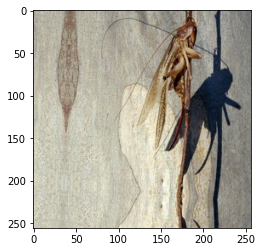

In [47]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    #plt.imshow(images_batch[0].numpy().astype('uint8'))  #this is our 1st image
    
    #print(images_batch[0].numpy().astype('uint8'))  # this will print 3-D RGB numbers
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict :")
    plt.imshow(first_image)
    print("First image's actual label :",class_names[first_label])
    # till here we load our image and label now we predict that image label
    
    batch_predication = model.predict(images_batch)   # image_batch predict for 32 images means batch by batch,, if we want 1st image predction then
    #print(batch_predication[0])   #it'll show 3d array coz,we use softmax here
    
    # print(np.argmax(batch_predication[0]))    #yha argmax lgake max probabilty le hai 
    
    print("predicated labe is :",class_names[np.argmax(batch_predication[0])])  # here class print krwa de us class ke
    pesticide(class_names[np.argmax(batch_predication[0])])

In [48]:
def pesticidee(img_name):
    if img_name=='Field Cricket':
        return('Talstar PL granular')
    elif img_name=='Jute Stem Weevil':
        return('Spray 2.5kg of carbaryl 50 WP in 625 L of water per ha ')
    elif img_name=='Spilosoma Obliqua':
        return('cypermethrin')
    elif img_name=='Yellow Mite':
        return('Buprofezin 25% SC')
    elif img_name=='aphids':
        return('Insecticidal soaps and oils')
    elif img_name=='armyworm ':
        return('Chlorantraniliprole, emamectin benzoate, and spinetoram')
    elif img_name=='beetle':
        return('Chlorpyrifos')
    elif img_name=='bollworm':
        return('Spray pyrethroids 100 days after sowing for this pest')
    elif img_name=='grasshopper':
        return('Malathion, carbaryl and permethrin')
    elif img_name=='mites':
        return('Azobenzene, dicofol, ovex, and tetradifon')
    elif img_name=='mosquito':
        return('organophosphate insecticides malathion')
    elif img_name=='sawfly':
        return('Permethrin, bifenthrin, lambda cyhalothrin and carbaryl')
    elif img_name=='stem borer':
        return('furadan applicatio')

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())   #convert image into array
    img_array = tf.expand_dims(img_array, 0)                  # creat a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    
    confidence = round(100 * (np.max(predictions[0])), 2)
    Pesticidee = pesticidee(predicted_class)
    return predicted_class, confidence, Pesticidee

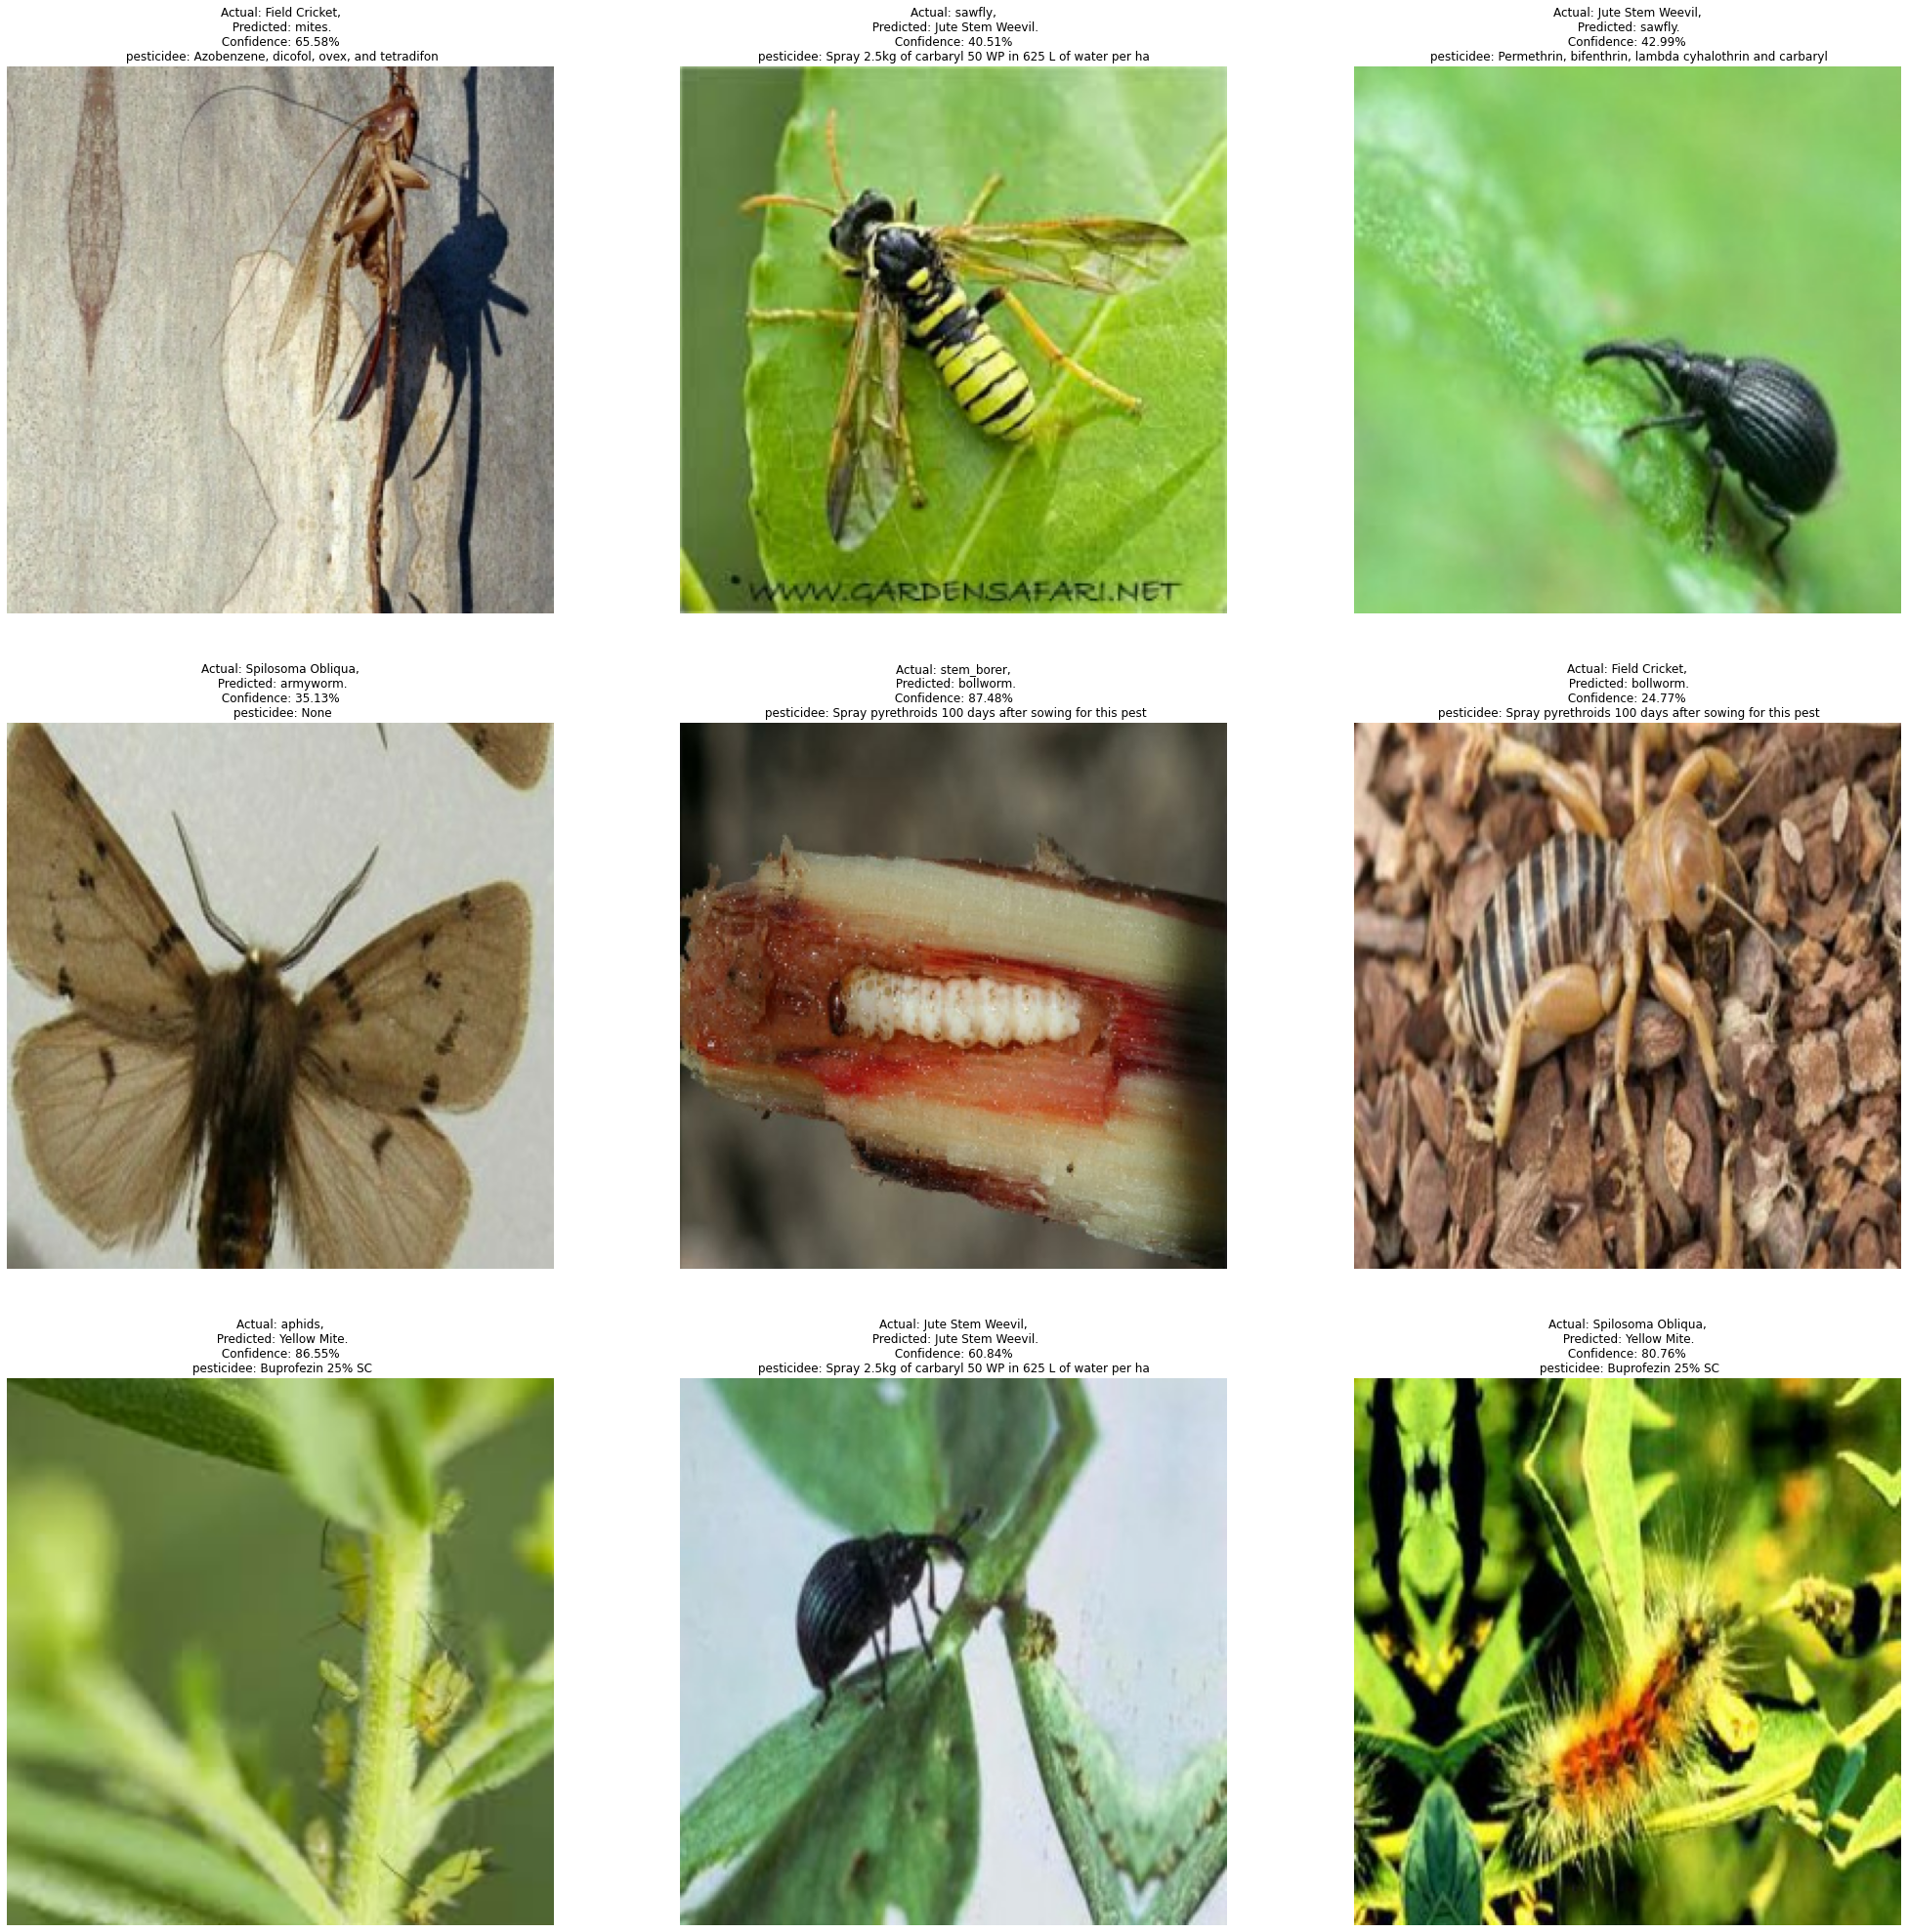

In [50]:
plt.figure(figsize=(35,35))

for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence,Pesticidee  = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}% \n pesticidee: {Pesticidee}")
        
        plt.axis("off")
        